## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\aputhoo\AppData\Local\Temp\ipykernel_10552\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 11s 5s/step - loss: 4.9091 - accuracy: 0.3125 - val_loss: 12.4076 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 7.8305 - accuracy: 0.3438 - val_loss: 9.1432 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 8.6604 - accuracy: 0.3906 - val_loss: 6.3149 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 5.2163 - accuracy: 0.4375 - val_loss: 4.1633 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 5s 4s/step - loss: 4.6795 - accuracy: 0.3438 - val_loss: 3.0380 - val_accuracy: 0.2931
Epoch 6/50
2/2 [==============================] - 5s 3s/step - loss: 3.4042 - accuracy: 0.4531 - val_loss: 4.9654 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 5s 3s/step - loss: 2.4916 - accuracy: 0.4688 - val_loss: 3.7139 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=======================

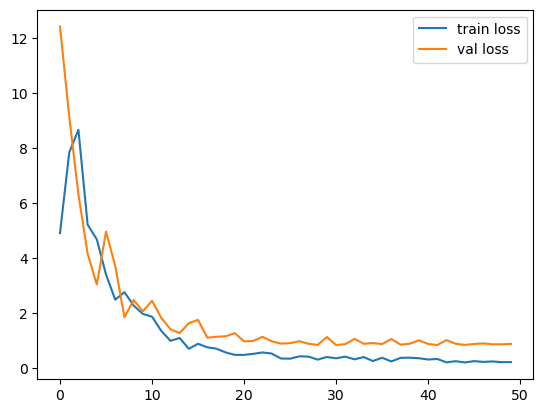

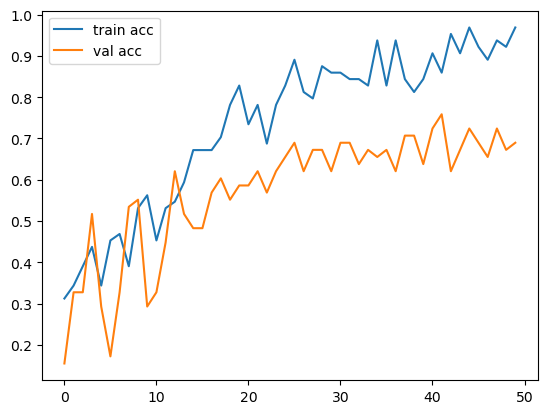

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


2/2 [==============================] - 3s 1s/step


In [17]:
y_pred

array([[1.60377529e-02, 3.10494303e-04, 9.83651698e-01],
       [3.71933519e-03, 3.29512507e-01, 6.66768253e-01],
       [9.05857563e-01, 5.19382469e-02, 4.22042198e-02],
       [1.79795045e-02, 2.39356428e-01, 7.42663980e-01],
       [5.82241220e-04, 9.71807957e-01, 2.76096929e-02],
       [1.21361669e-02, 4.79531944e-01, 5.08331776e-01],
       [7.58891692e-03, 6.63982332e-01, 3.28428745e-01],
       [2.49638539e-02, 4.70142514e-01, 5.04893661e-01],
       [9.46098715e-02, 4.50488508e-01, 4.54901546e-01],
       [6.65527046e-01, 3.22244316e-01, 1.22286407e-02],
       [1.39049619e-01, 4.20851856e-01, 4.40098554e-01],
       [1.86495744e-02, 7.46256232e-01, 2.35094190e-01],
       [2.64035285e-01, 6.73767477e-02, 6.68587923e-01],
       [7.61585310e-03, 9.65181291e-01, 2.72028670e-02],
       [3.37309370e-06, 1.16449129e-03, 9.98832166e-01],
       [4.77214605e-01, 1.85525455e-02, 5.04232824e-01],
       [8.76747444e-02, 6.50730908e-01, 2.61594355e-01],
       [2.67421245e-03, 9.51536

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [24]:
img=image.load_img('Datasets/Datasets/Test/audi/21.jpg',target_size=(224,224))



In [25]:
x=image.img_to_array(img)
x

array([[[194.,  57.,  65.],
        [184.,  53.,  59.],
        [175.,  49.,  53.],
        ...,
        [129., 139., 141.],
        [191., 201., 203.],
        [156., 166., 168.]],

       [[161.,  36.,  40.],
        [157.,  37.,  39.],
        [153.,  37.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       [[161.,  36.,  40.],
        [157.,  37.,  39.],
        [153.,  37.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       ...,

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  87.,  87.],
        ...,
        [ 92.,  95., 100.],
        [ 79.,  82.,  87.],
        [113., 116., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  87.,  87.],
        ...,
        [ 92.,  95., 100.],
        [ 79.,  82.,  87.],
        [113., 116., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[5.6495628e-04, 1.2877759e-03, 9.9814725e-01]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 102ms/step


In [31]:
a==1

array([False])